<a href="https://colab.research.google.com/github/mahernher/Affirmations/blob/master/practica6_adicional2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 6. Ejercicio adicional 2: Detectando el subajuste y el sobreajuste

En este notebook veremos como podemos visualizar el
subajuste y el sobreajuste de un modelo. Para ello utilizaremos dos gráficas:
la curva de validación y la curva de aprendizaje.

### Curva de validación

La curva de validación nos permite visualizar el rendimiento de un modelo tanto en el conjunto de entrenamiento como en el de test para distintos valores. En concreto podemos utilizar validación cruzada para ver cuando se produce el subajuste y el sobreajuste.

Empezamos descargando, y posteriormente cargando, el fichero `plot_curves` que sirve para visualizar las curvas de validación.

In [1]:
!wget https://raw.githubusercontent.com/IA1819/Code/master/plot_curves.py -O plot_curves.py

--2023-03-29 13:51:53--  https://raw.githubusercontent.com/IA1819/Code/master/plot_curves.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2662 (2.6K) [text/plain]
Saving to: ‘plot_curves.py’

plot_curves.py      100%[===================>]   2.60K  --.-KB/s    in 0s      

2023-03-29 13:51:53 (40.1 MB/s) - ‘plot_curves.py’ saved [2662/2662]



In [2]:
from plot_curves import *

Vamos a utilizar un dataset existente de dígitos manuscritos que vimos en la práctica 5.

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
Xdigits, ydigits = digits.data, digits.target

Vamos a explorar la curva de validación el algoritmo SVM y utilizando distintos parámetros de gamma que vienen dados por el siguiente rango de parámetros.

In [4]:
param_range = np.logspace(-6, -1, 5)

Invocamos a la función `plot_validation_curve` pasándole el modelo que queremos utilizar, las instancias, sus etiquetas, el nombre del parametro que vamos a explorar, el valor de k para la validacion cruzada (argumento cv) y la metrica que utilizamos para medir la bondad del clasificador. 

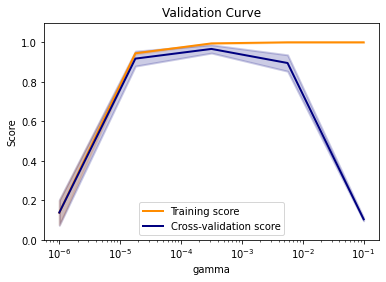

In [5]:
from sklearn.svm import SVC
%matplotlib inline
plot_validation_curve(
    SVC(), Xdigits, ydigits, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy")

##### Pregunta
¿Para qué valores de gamma se produce el subajuste? ¿y el sobreajuste?.


In [13]:
param_range = np.logspace(-6, -4, 2)

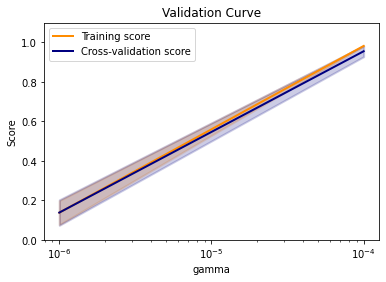

In [14]:
%matplotlib inline
plot_validation_curve(
    SVC(), Xdigits, ydigits, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy")

El subajuste se produce entre gamma 10^-6 y 10^-4

In [19]:
param_range = np.logspace(-2, 0, 2)

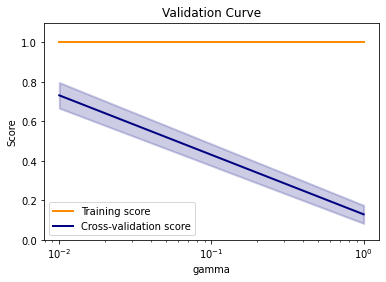

In [20]:
%matplotlib inline
plot_validation_curve(
    SVC(), Xdigits, ydigits, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy")

El sobreajuste se produce a partir de 10^-2

## Curva de aprendizaje 

Para generar las curvas de aprendizaje que vimos en clase se puede usar la función `plot_learning_curve` pasándole el modelo que queremos utilizar, las instancias y las etiquetas. Notad que las curvas de aprendizaje que se generan aquí no están basadas en el error del clasificador sino en su rendimiento.

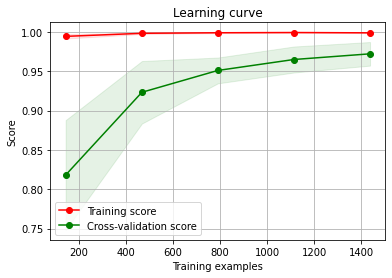

In [21]:
plot_learning_curve(SVC(gamma=0.001), Xdigits, ydigits)

##### Ejercicio
Genera nuevas curvas de aprendizaje utilizando otros modelos.

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
from sklearn.neural_network import MLPClassifier

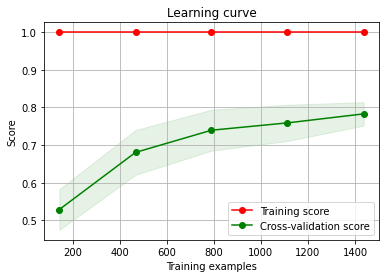

In [39]:
plot_learning_curve(DecisionTreeClassifier(min_samples_split=2), Xdigits, ydigits)

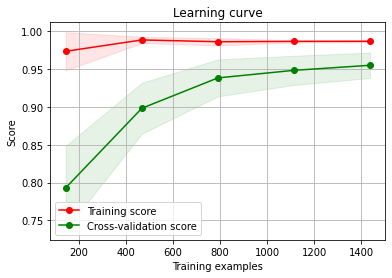

In [44]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=10), Xdigits, ydigits) 

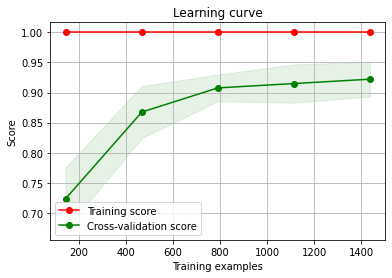

In [47]:
plot_learning_curve(MLPClassifier(), Xdigits, ydigits) 

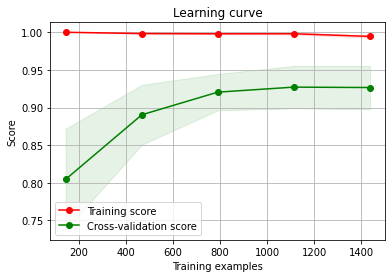

In [48]:
plot_learning_curve(LogisticRegression(solver='newton-cg',penalty='l2',C=0.01), Xdigits, ydigits) 

Recuerda guardar este notebook usando la opción *"Save in GitHub..."*.